In [10]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [12]:
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))

In [13]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [18]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 5s - loss: 7.3886 - acc: 0.5408 - val_loss: 7.0837 - val_acc: 0.5602
Epoch 2/4
60000/60000 [==============================] - 4s - loss: 7.2687 - acc: 0.5484 - val_loss: 7.2155 - val_acc: 0.5517
Epoch 3/4
60000/60000 [==============================] - 5s - loss: 6.9304 - acc: 0.5689 - val_loss: 6.1076 - val_acc: 0.6199
Epoch 4/4
60000/60000 [==============================] - 5s - loss: 6.1825 - acc: 0.6156 - val_loss: 5.8803 - val_acc: 0.6345


{'acc': [0.54081666666666661, 0.5484, 0.5688833333333333, 0.6156166666666667], 'loss': [7.3885669277191166, 7.2687099712371825, 6.9303795017242429, 6.182496994654338], 'val_acc': [0.56020000000000003, 0.55169999999999997, 0.61990000000000001, 0.63449999999999995], 'val_loss': [7.0837281913757328, 7.2154660034179692, 6.1076321823120114, 5.8802514554977421]}


,acc,loss,val_acc,val_loss
0,0.540817,7.388567,0.5602,7.083728
1,0.548400,7.268710,0.5517,7.215466
2,0.568883,6.930380,0.6199,6.107632
3,0.615617,6.182497,0.6345,5.880251


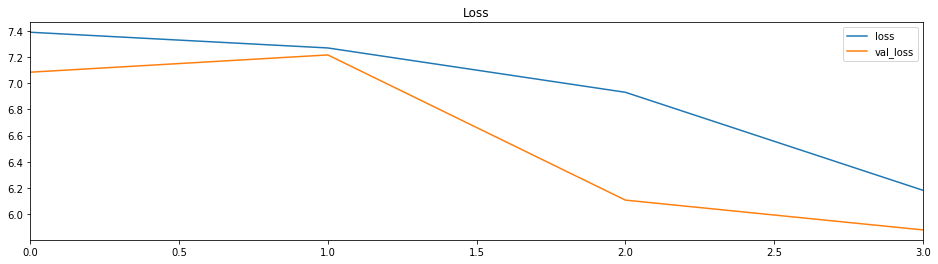

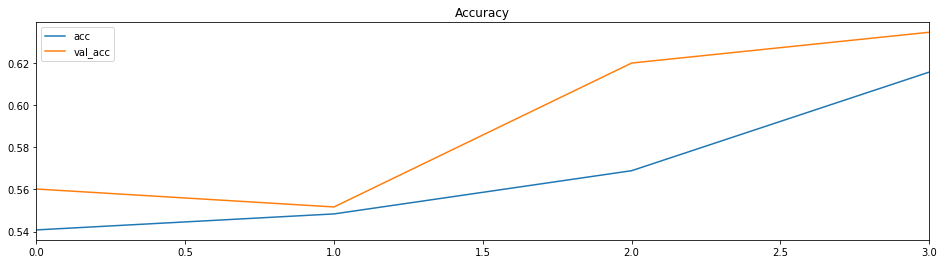

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(hist.history)

df = pd.DataFrame(hist.history)
display(df)

df.plot(y=['loss', 'val_loss'], figsize=(16,4), title='Loss')
df.plot(y=['acc', 'val_acc'], figsize=(16,4), title='Accuracy');